# Overview
### Using machine learning and NLP for spam detection in Twitter

### Beginning Steps
1. Reading Test Data
2. Visualizing Data

### Natural Language Processing Introduction
1. Tokenizing
2. Removing Stop Words
3. Removing Punctuation
4. Stemming

### Creating Pandas DataFrame
1. Indexing
2. Separating Spam from Ham Tweets

### Creating a Word Map
1. Word map for Ham tweets
2. Word map for spam Tweets

# Setup

## Imports

In [2]:
# system packages
import sys
import os

# machine learning packages
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

# nltk packages
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# wordcloud
from wordcloud import WordCloud
from PIL import Image

%matplotlib inline

## Constants

In [3]:
TRAIN_PATH = 'datasets/train.csv'
TEST_PATH = 'datasets/test.csv'

VOCAB_SIZE = 2500

# Reading Test Data

In [4]:
df_train = pd.read_csv(TRAIN_PATH)
df_train

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality,NaN
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam,NaN
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality,NaN
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality,NaN
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality,NaN
...,...,...,...,...,...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam,NaN
14895,"They don't have to like you, and you don't hav...",0.0,0.0,0.0,0.0,NaN,Quality,NaN
14896,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam,NaN
14897,@bethannhamilton is in the business of one-upp...,0.0,0.0,NaN,0.0,"Southgate, MI",Quality,NaN


## Data Visualization

In [5]:
# Get Number of Ham Tweets
is_ham = df_train['Type'] == 'Quality'
df_train_ham = df_train[is_ham]
print('num_ham:', df_train_ham.size)

# Get Number of Spam Tweets
is_spam = df_train['Type'] == 'Spam'
df_train_spam = df_train[is_spam]
print('num_spam:', df_train_spam.size)

num_ham: 59632
num_spam: 59544


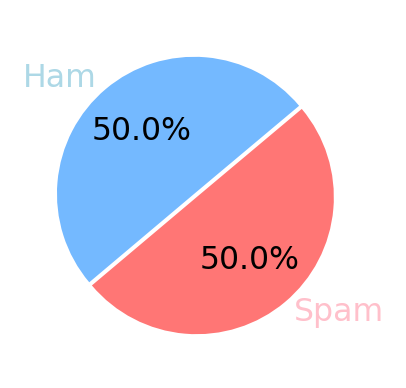

In [6]:
# Creating Pie Chart
category_names = ['Ham', 'Spam']
sizes = [df_train_ham.size, df_train_spam.size]
custom_colors = ['#74b9ff','#ff7675']

plt.figure(figsize=(2, 2), dpi=227)
wedges, labels, percents = plt.pie(sizes, labels=category_names, textprops={'fontsize': 10}, 
                                   startangle=40, autopct='%1.1f%%', colors=custom_colors, 
                                    explode=[0, 0.03])

# label colors
labels[0].set_color('lightblue')
labels[1].set_color('pink')
    
# display pie chart
plt.show()

# Natural Language Processing

1. Convert to lowercase
2. Tokenizing
3. Removing stop words
4. Remove formatting
5. Word Stemming
6. Remove punctuation

## download the NLTK resources (tokenizer & stop words)

tokenizing means splitting up a words in a sentence into individual words

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/berimbolo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/berimbolo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Tokenizing Example

In [9]:
msg = 'CSC845 test sentence for team Heavily Caffeinated'
word_tokenize(msg.lower())

['csc845', 'test', 'sentence', 'for', 'team', 'heavily', 'caffeinated']

## Removing Stop Words

In [10]:
stop_words = set(stopwords.words('english'))

In [11]:
''' Example of filtering words '''

from functools import reduce
stemmer = PorterStemmer()

msg = 'created CSC845 test sentence for team Heavily Caffeinated. I like pie.'
words = word_tokenize(msg.lower())

# using reduce
filtered_words = reduce(lambda a,b: a + [stemmer.stem(b)] if b not in stop_words and b.isalpha() else a, words, [])
filtered_words

['creat', 'test', 'sentenc', 'team', 'heavili', 'caffein', 'like', 'pie']

## Consildating NLP into a single function

In [12]:
''' Method tokenizes, removes punctuation, removes stop words, and stems'''
def clean_tweet(message, stemmer=PorterStemmer(), stem=False,
                stop_words=set(stopwords.words('english'))):
    words = word_tokenize(message.lower())
    if stem:
        return reduce(lambda a,b: a + [stemmer.stem(b)] if b not in stop_words and b.isalpha() else a, words, [])
    else:
        return reduce(lambda a,b: a + [b] if b not in stop_words and b.isalpha() else a, words, [])

In [13]:
''' testing function '''
clean_tweet(msg)

['created',
 'test',
 'sentence',
 'team',
 'heavily',
 'caffeinated',
 'like',
 'pie']

# Slicing Dataframes

## Single Entry

In [14]:
''' Get a specific entry '''
print(df_train.iat[0,0])

Good Morning Love  @LeeBrown_V


## Function that cleans a tweet

In [15]:
%%time

# Creating nested lists
nested_list = df_train.Tweet.apply(clean_tweet)
nested_list_stemmed = df_train.Tweet.apply(clean_tweet, stem=True)

# flattening the lists
flat_list = [item for sublist in nested_list for item in sublist]
flat_list_stemmed = [item for sublist in nested_list_stemmed for item in sublist]

CPU times: user 5.56 s, sys: 18.6 ms, total: 5.58 s
Wall time: 5.6 s


## Grabbing the indices of SPAM and HAM Tweets

In [16]:
doc_ids_spam = df_train[df_train.Type == 'Spam'].index
doc_ids_ham = df_train[df_train.Type == 'Quality'].index

## Separate the spam from the ham words

In [17]:
nested_list_ham = nested_list.loc[doc_ids_ham]
nested_list_ham_stemmed = nested_list_stemmed.loc[doc_ids_ham]
nested_list_ham.tail()

14889    [need, hear, tvvins, singing, version, live, h...
14890    [know, add, goals, google, calendar, kinda, co...
14892    [actually, last, national, referendum, charlot...
14895                                         [like, care]
14897                    [bethannhamilton, business, good]
Name: Tweet, dtype: object

In [18]:
nested_list_spam = nested_list.loc[doc_ids_spam]
nested_list_spam_stemmed = nested_list_stemmed.loc[doc_ids_spam]
nested_list_spam.tail()

14891           [loading, back, moods, christmasaftermath]
14893    [kendrys, morales, hits, homerun, royals, snap...
14894    [allwentwrongwhen, told, hair, stylist, go, nuts]
14896    [miami, graham, nash, live, parker, playhouse,...
14898     [chasing, success, space, cadetz, listen, https]
Name: Tweet, dtype: object

### Creating array of ham Words

In [33]:
# Non spam tweets
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
flat_list_ham_stemmed = [item for sublist in nested_list_ham_stemmed for item in sublist]
ham_words = pd.Series(flat_list_ham).value_counts() # unique words
type(ham_words)


pandas.core.series.Series

### Creating array of Spam Words

In [20]:
# spam tweets
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
flat_list_spam_stemmed = [item for sublist in nested_list_spam_stemmed for item in sublist]

### Unique Words

In [21]:
# spam words
spam_words = pd.Series(flat_list_spam).value_counts()
spam_words_stemmed = pd.Series(flat_list_spam_stemmed).value_counts()

# ham words
ham_words_stemmed = pd.Series(flat_list_ham_stemmed).value_counts()
ham_words.shape[0] # total num of unique ham words

14539

### Creating a World Cloud for ham words

In [22]:
''' Creating map of words because word map needs a string of words '''
ham_str = ' '.join([word for word in flat_list_ham])
flat_list_ham.count('http')

1548

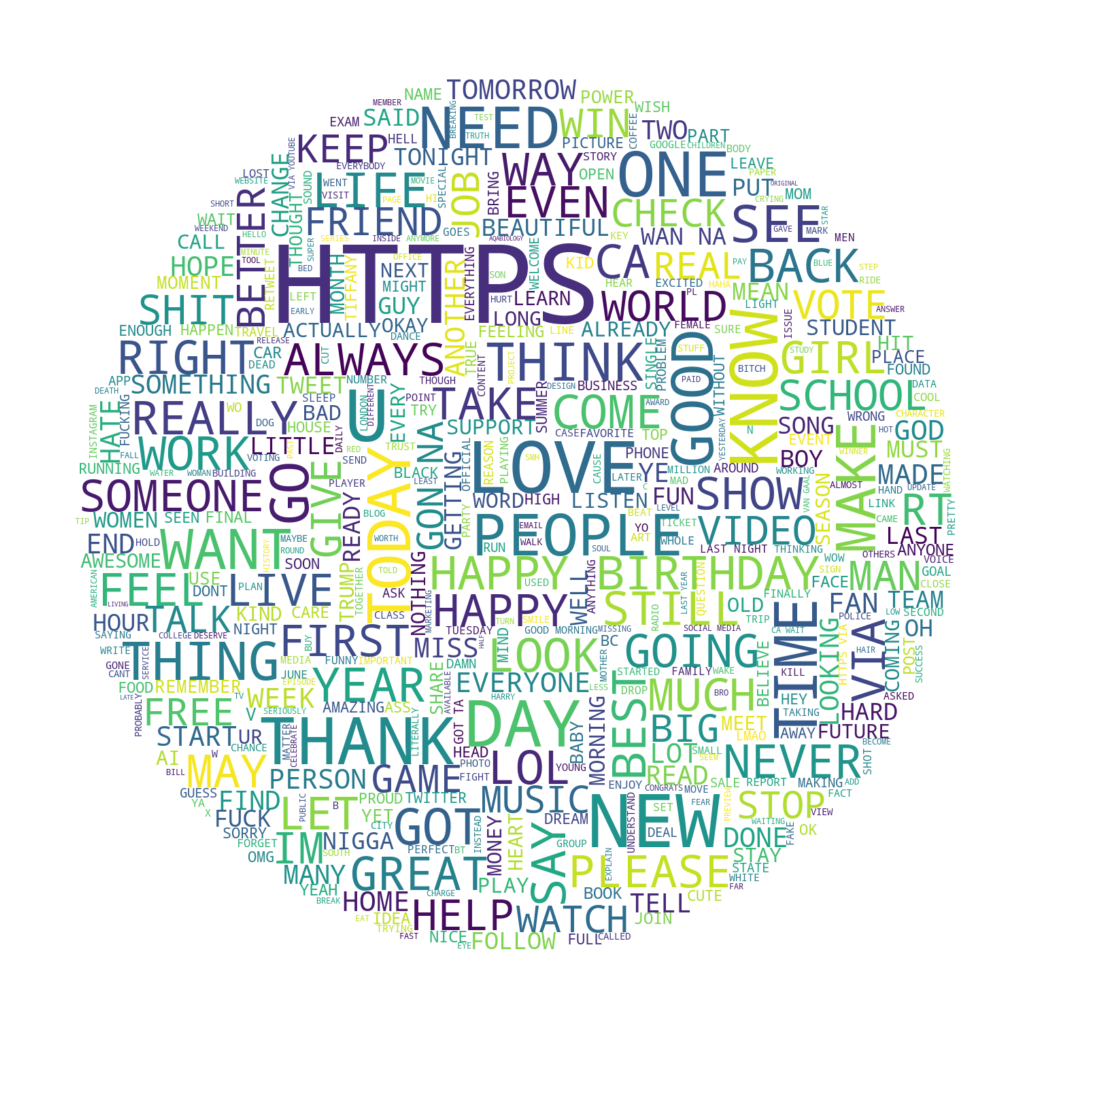

In [23]:
# open png file and creating mask
icon = Image.open('circle.jpg').convert("RGBA")
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)
rgb_array = np.array(image_mask) # converts the image object to an array

# Creating word cloud
plt.figure(figsize=[100, 20])
world_cloud = WordCloud(mask=rgb_array, background_color='white', max_words=500)
world_cloud.generate(ham_str.upper())
plt.imshow(world_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Creating a World Cloud for Spam Words

In [24]:
''' Creating map of words because word map needs a string of words '''
spam_str = ' '.join([word for word in flat_list_spam])

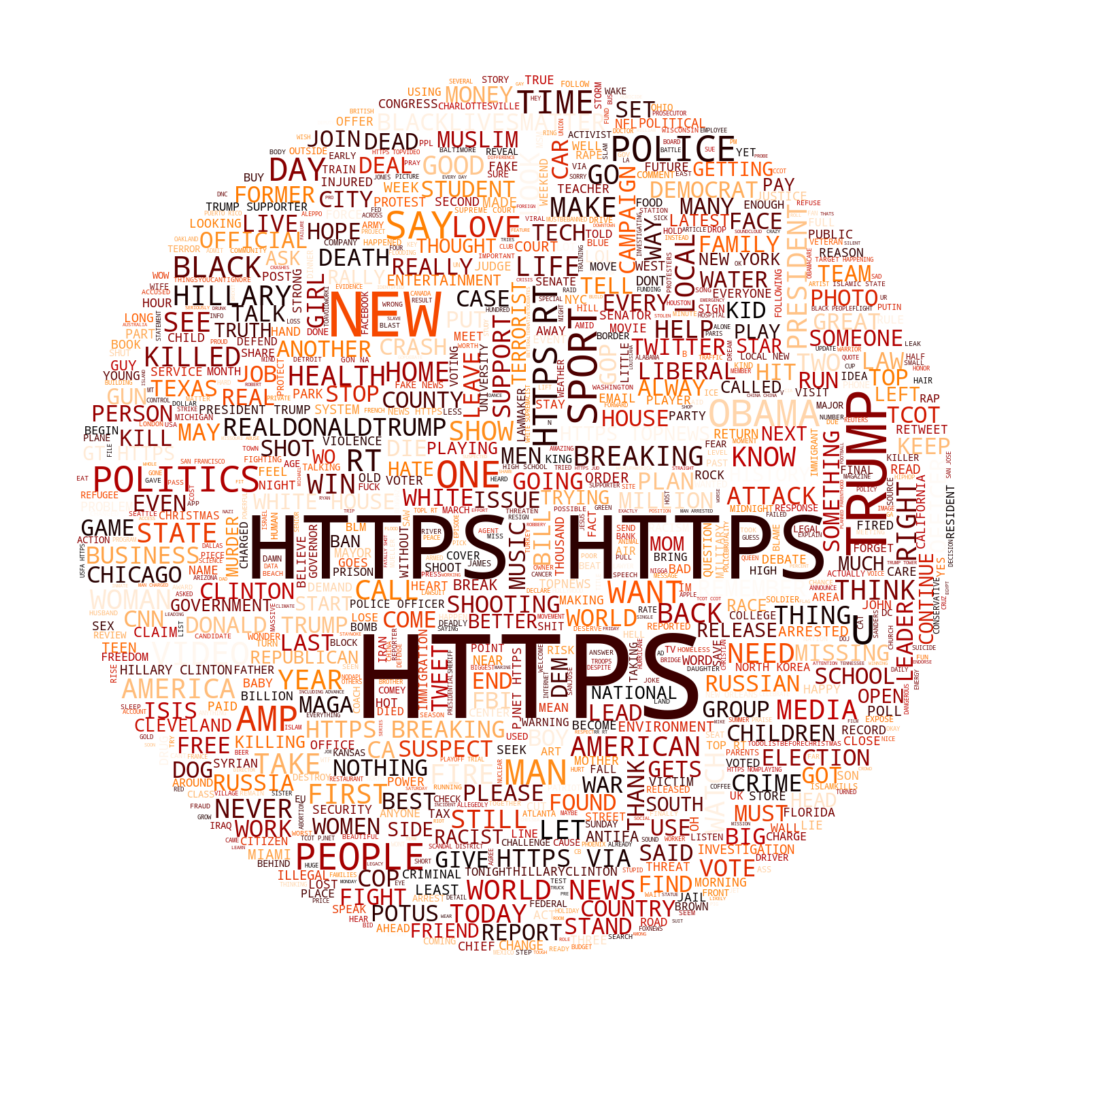

In [25]:
# open png file and creating mask
icon = Image.open('circle.jpg').convert("RGBA")
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)
rgb_array = np.array(image_mask) # converts the image object to an array

# Creating word cloud
plt.figure(figsize=[100, 20])
world_cloud = WordCloud(mask=rgb_array, background_color='white', max_words=1000,
                       colormap='gist_heat')
world_cloud.generate(spam_str.upper())
plt.imshow(world_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
''' Shape of image mask '''
rgb_array.shape

(1600, 1600, 3)

# Generate Vocabulary & Dictionary

In [34]:
unique_words = pd.Series(flat_list_stemmed).value_counts()
print('Nr of unique words', unique_words.shape[0])

Nr of unique words 18862


In [36]:
frequent_words = unique_words[0:VOCAB_SIZE]
print('Most common words: \n', frequent_words[:5])

Most common words: 
 http     8459
trump     646
news      619
get       504
new       492
dtype: int64


# Create Vocabulary DataFrame with a WORD_ID

In [30]:
word_ids = list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index=word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

,VOCAB_WORD
WORD_ID,
0,http
1,trump
2,news
3,get
4,new


# Save the vocab as a CSV file

In [31]:
vocab.to_csv('datasets/vocab.csv', index_label=vocab.index.name, header=vocab.VOCAB_WORD.name)

# Checking if a word is part of the vocabulary

In [38]:
'love' in set(vocab.VOCAB_WORD)

True

# Feature Extraction 

## Content Based Features

This is the actual tweet itself

1. Ratio of spam words to non-spam words
2. Length of the tweet

## User Based Features

1. Ratio of followers to followees
2. Total number of posts
3. 